<a href="https://colab.research.google.com/github/andrew-veriga/MathForML/blob/master/ConvolutionalCoffieCircles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load libs

In [2]:
import tensorflow as tf
import numpy as np

### Load picture

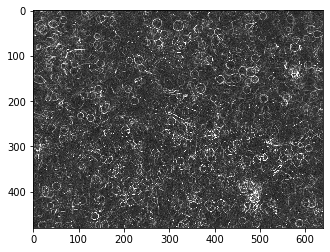

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path='https://github.com/andrew-veriga/MathForML/blob/master/CoffieCircles.png?raw=true'
#img_path='https://drive.google.com/file/d/1Nho1Ed_TnlSzTkJ0v0pc9dfvQH-HOws9/view?usp=sharing'
#img_path='https://www.dropbox.com/s/8naq7w6w2egpl6t/CoffieCircles.png?dl=0'
Image = mpimg.imread(img_path)
plt.imshow(Image)

In [4]:
print(Image.shape)

(480, 640, 4)


###Prepare picture
Convert Image to 2D

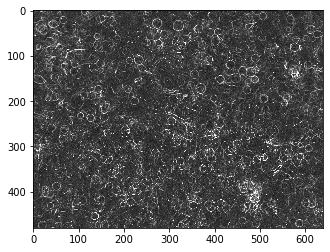

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

Image = rgb2gray(Image)    
plt.imshow(Image, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

In [6]:
print (Image.shape)

(480, 640)


###Init variables

`MaxSize` - max size of square region

`MinSize` - min size of square region

`Contrast` - scalar set contrast of recognizing ring 
`Thick` - thickness of ring
`FoundCircles` - numpy array of centers and radiuces (3,None)

In [0]:
firstX=1
firstY=1
ImageSize = (48,90) #Image.shape
MaxSize = 40 
MinSize = 10
Contrast = .18
Variance = 0.03
Thick = .8
FoundCircles = np.array([0,3])
_DEBUG_=False

In [0]:
# from scipy.spatial import distance
# for i in range(0,a.shape[0]):
#   d = [np.sum((a[i]-a[j])**2) for j in range(i+1,a.shape[0])] 
#   print(d) 

###function isCircleFound
calculate average brightness over all pixels of current square;
If pixels of SelectedRing have avg brightness more then avg brightness over all square - circle is found 


In [0]:
#from scipy.special import softmax

def isCircleFound(_box, _mask):
  
  brightness = (lambda arr: np.average(arr-np.min(_box)))#/(np.max(arr)-np.min(box))))
  if _DEBUG_:
    print (brightness(_box[_mask]))
    print (brightness(_box[~_mask]))
  if ((brightness(_box[_mask]) - brightness(_box[~_mask])) > Contrast and np.var(_box[_mask]) < Variance):
    print (brightness(_box[_mask]))
    print (brightness(_box[~_mask]))
    print(np.var(_box[_mask]))
    return True
  else:
    return False
  

### function FuzzyCircleConv

In [0]:
import numpy.ma as ma

def FuzzyCircleConv(_box, _mask):
  # return sum(np.dot(_box,_mask))
  mlt = np.multiply(_box,_mask)
  return np.sum(mlt)#/ np.var(ma.masked_values(mlt, 0.0 ))
  

###function getFuzzyMask

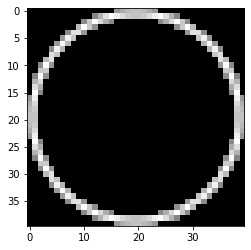

In [11]:
import itertools
import numpy as np
import random as rn
    # size=40 
    # thick = 1
MaxPix = np.max(Image)
MinPix = np.min(Image)

def getFuzzyMask( size, thick = 1. ):
    radius = size //2-1
    center = np.array([size/2-.5,size/2-.5])
    vectors = [[(i,j, thick - np.abs(np.linalg.norm((i,j) - center) - radius)) for j in range(size)] for i in range(size)]
    l = itertools.chain.from_iterable(zip(*vectors))
    
    # list of pairs (x,y) belong of ring
    selectedVecs = np.array(list(filter(lambda v: v[2] > 0. ,l)))
    #ring mask
    ring = np.ones((size,size), dtype=np.float32) #np.random.rand(size,size)
    # print(selectedVecs.T[2])
    # print(np.max(selectedVecs.T[2]))
    maxMask= np.max(selectedVecs.T[2])
    ring = -(ring - MinPix)/(MaxPix-MinPix)
    
    for (i,j,k) in (selectedVecs):
      ring[np.int(i),np.int(j)]=k/maxMask

    return ring
plt.imshow(getFuzzyMask(40,1),cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)


###One example of arbitrary ring

Conv value: -0.23938815451312112


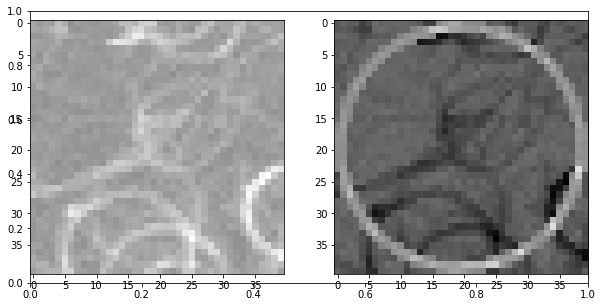

In [12]:
Mask = getFuzzyMask( MaxSize, 1 )
square = Image[firstY:firstY+MaxSize, firstX:firstX+MaxSize]
    
#ring visualisation
#ring visualisation
fig, ax = plt.subplots(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.imshow(square, cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)

ax1=fig.add_subplot(1,2,2)

ax1.imshow(np.multiply(square,Mask), cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)
fig.show()
print('Conv value:',FuzzyCircleConv(square,Mask)/MaxSize**2)


###One example of founded ring

conv value -0.08034258328586487


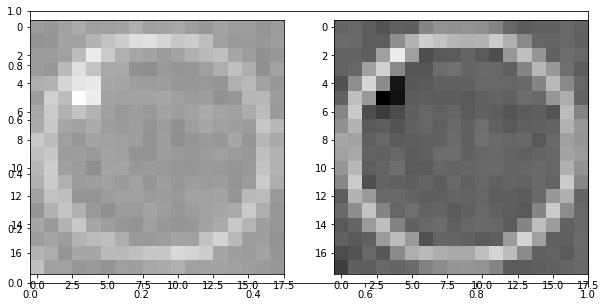

In [13]:
#SquareSize=20, (x,y)= 57, 13

x=58
y=13
size=18
Mask = getFuzzyMask( size, 1 )
square = Image[y:y+size, x:x+size]
    
#ring visualisation
fig, ax = plt.subplots(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.imshow(square, cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)

ax1=fig.add_subplot(1,2,2)
#ax1.imshow(square, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
#ax1.imshow(Mask,alpha=.5)
ax1.imshow(np.multiply(square,Mask), cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)
fig.show()
print('conv value', FuzzyCircleConv(Mask,square)/size**2)
#print(FuzzyCircleConv(square,Mask))
# _DEBUG_=True
# print(isCircleFound(square, Mask))
# print(np.var(square[Mask]))
# _DEBUG_=False

### Main loops


conv value -0.15040748785310323
-0.15040748785310326


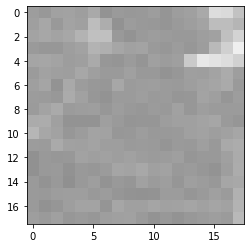

In [14]:
  
  SquareSize=18
  _mask=getFuzzyMask( SquareSize, Thick )
  mask_size = _mask.shape[0]
  pad_size = mask_size // 2
  rest = mask_size % 2
  horisontal_pad = np.random.rand(ImageSize[0], pad_size)#, dtype=np.float64)
  vertical_pad = np.zeros((pad_size, ImageSize[1]+pad_size*2), dtype=np.float64)
  a = np.hstack((horisontal_pad, Image[:ImageSize[0],:ImageSize[1]], horisontal_pad))
  a = np.vstack((vertical_pad, a, vertical_pad))

  sub_shape = (_mask.shape)
  view_shape = (ImageSize[0]+ rest,ImageSize[1]+ rest, sub_shape[0] , sub_shape[1] )
  strides = a.strides + a.strides
  sub_matrices = np.lib.stride_tricks.as_strided(a,view_shape,strides)
  #arbirtary region
  square = sub_matrices[pad_size,pad_size,:,:]
  plt.imshow(square,plt.get_cmap('gray'), vmin=-1, vmax=1)
  print('conv value', FuzzyCircleConv(_mask,square)/size**2)
  m=np.sum(np.multiply(sub_matrices,_mask), axis=(2,3))/(mask_size**2)
  # m = np.sum(np.multiply(square,_mask))/(mask_size**2)
  print(m[pad_size,pad_size])  

In [15]:
sub_matrices.shape

(48, 90, 18, 18)

conv value -0.11181741983140857
-0.11181741983140857


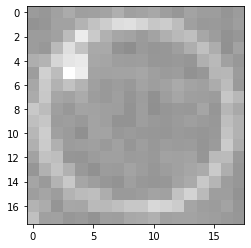

In [16]:
#founded ring
square = sub_matrices[pad_size+13,pad_size+58,:,:]
plt.imshow(square,plt.get_cmap('gray'), vmin=-1, vmax=1)
print('conv value', FuzzyCircleConv(_mask,square)/size**2)
m=np.sum(np.multiply(sub_matrices,_mask), axis=(2,3))/(mask_size**2)

print(m[pad_size+13,pad_size+58])

In [17]:
  sub_matrices.shape


(48, 90, 18, 18)

In [0]:
#https://stackoverflow.com/questions/43086557/convolve2d-just-by-using-numpy
def conv(_mask):
  # _mask = getFuzzyMask( size, Thick )
  mask_size = _mask.shape[0]
  pad_size = mask_size // 2
  rest = 0#mask_size % 2
  horisontal_pad = np.random.rand(ImageSize[0], pad_size)#, dtype=np.float64)
  vertical_pad = np.zeros((pad_size, ImageSize[1]+pad_size*2), dtype=np.float64)
  a = np.hstack((horisontal_pad, Image[:ImageSize[0],:ImageSize[1]], horisontal_pad))
  a = np.vstack((vertical_pad, a, vertical_pad))

  sub_shape = (mask.shape)
  view_shape = (ImageSize[0]+ rest,ImageSize[1]+ rest, sub_shape[0] , sub_shape[1] )
  strides = a.strides + a.strides
  sub_matrices = np.lib.stride_tricks.as_strided(a,view_shape,strides)


  # m=np.sum(np.multiply(sub_matrices,_mask), axis=(2,3))/(mask_size**2)
  m = np.einsum('ij,klij->kl',mask,sub_matrices)/mask_size**2
  return m
  

In [19]:
ConvMatrices = np.empty((0,ImageSize[0],ImageSize[1]))
for size in range(MinSize,MaxSize):
  mask = getFuzzyMask( size, 1 )
  #print('size '+str(size))
  res = conv(mask)
  ConvMatrices= np.concatenate((ConvMatrices, np.reshape(res,(1,ImageSize[0],ImageSize[1]))),axis=0)

  # x=58
  # y=13
  # size=18
  # Thick= 1
  # conv value -0.08034258328586487
print(ConvMatrices[18-MinSize,pad_size+13,pad_size+58])

# for y in range(0,ImageSize[0]-size):
    # for x in range(0, ImageSize[1] - size):
    #   square = Image[y:y+size, x:x+size]
    #   ConvMatrices[y,x, size - MinSize] = FuzzyCircleConv(square,mask)
    #   # fig, ax = plt.subplots()
    #   # ax = fig.add_subplot(1,2,1)
    #   # ax.imshow(square, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    #   # ax1=fig.add_subplot(1,2,2)
    #   # ax1.imshow(square, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    #   # ax1.imshow(mask,alpha=.5)
    #   # fig.show()
    #   # print([(x,y),size])
      

    

-0.08034258328586485


In [20]:
print(ConvMatrices.shape)

(30, 48, 90)


In [0]:
# outfile = TemporaryFile()
np.save('ConvMatrices', ConvMatrices)

In [0]:
plt.imshow()

size:  10
-5 -5 -0.015887026024047745
-4 -5 -0.022712313852665904
-3 -5 -0.05816416732414291
-2 -5 -0.033559382586905426
-1 -5 -0.03178931072033321
0 -5 -0.034061452626691545
1 -5 -0.03274947787379736
2 -5 -0.025524676620198264
3 -5 -0.02374305310493177
4 -5 -0.01748403993673384
5 -5 -0.02857294158884527
6 -5 -0.03890063799499111
7 -5 -0.036336329881404075
8 -5 -0.04091669277098763
9 -5 -0.037813369293917404
10 -5 -0.028526928984643332
11 -5 -0.03778258374986764
12 -5 -0.05775152069758902
13 -5 -0.07494128059658836
14 -5 -0.06095537980547688
15 -5 -0.04499792175371697
16 -5 -0.035657691628273154
17 -5 -0.029320390569252792
18 -5 -0.027782904259093105
19 -5 -0.015367525007338791
20 -5 -0.015696234599554243
-5 -4 -0.03617249200131214
-5 -3 -0.05602538805806824
-5 -2 -0.07716889152542927
-4 -1 -0.06360124326219788
-4 0 -0.07817733626981055
-4 1 -0.07151337303361902
-4 2 -0.06329422074179465
-4 3 -0.055368598411113454
-4 4 -0.053605170488011965
-4 5 -0.07122246131371704
-3 6 -0.06309728548

IndexError: ignored

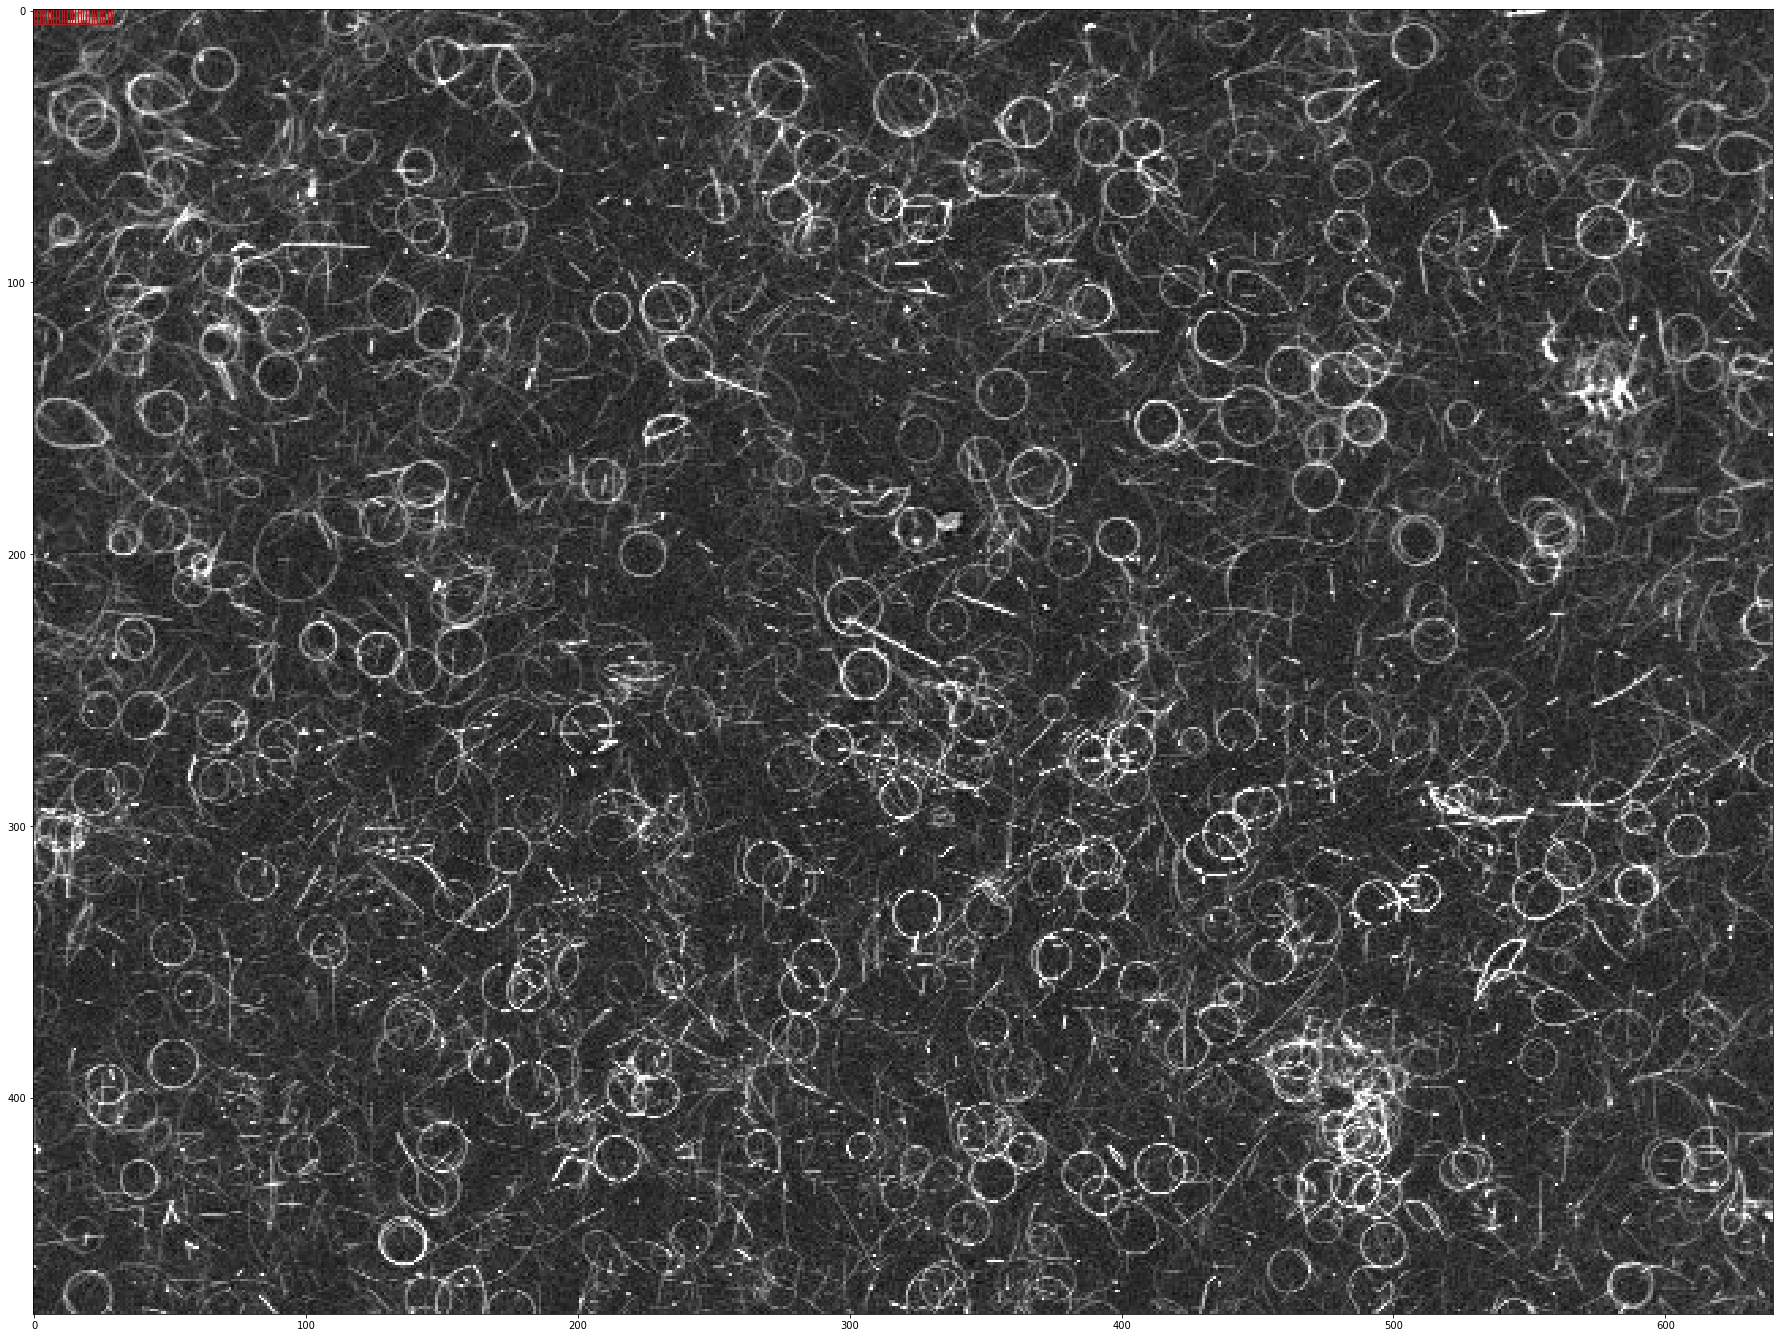

In [25]:
ItsRing=-0.08
import matplotlib.patches as patches
# plt.ioff()
fig, ax = plt.subplots(figsize=(32, 24))
ax.imshow(Image,cmap=plt.get_cmap('gray') )
# Create a Rectangle patch
rect_size = MinSize
cnt=0
for size in range(MinSize,MaxSize+1):
  print('size: ',size)
  convs = ConvMatrices[size-MinSize,:,:]
  for i in range(convs.shape[0]):
    y= i - size//2
    for j in range(convs.shape[1]):
      x = j - size //2
      if (convs[i,j]>ItsRing):
        print(x, y, convs[i,j])
        cnt+=1
        if (cnt>25):
          break
        rect = patches.Rectangle((x,y),size,size,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
plt.show()

In [0]:
#[(30, 101), 40]
y=101
x=30
size = 40
square = Image[y:y+size, x:x+size]
mask = getMask( size, Thick )
arr = square[mask]
box = square
st = (lambda arr: np.mean((arr-np.min(arr))))
print (st(box[mask]))
print (st(box[~mask]))
print(np.var(box[mask]))


In [55]:
x1 = np.arange(36.0).reshape((2, 2,3,3))
x2 = np.arange(9.0).reshape(3,3)
print (x1)
print(x2)
np.einsum('ij,ijkl->kl',x1,x2)

[[[[ 0.  1.  2.]
   [ 3.  4.  5.]
   [ 6.  7.  8.]]

  [[ 9. 10. 11.]
   [12. 13. 14.]
   [15. 16. 17.]]]


 [[[18. 19. 20.]
   [21. 22. 23.]
   [24. 25. 26.]]

  [[27. 28. 29.]
   [30. 31. 32.]
   [33. 34. 35.]]]]
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


ValueError: ignored